In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table

import sys
sys.path.insert(0, "../")

import velociraptor

%matplotlib inline

In [2]:
sources = Table.read("../data/rv-all.fits")

#is_binary = sources["p_sbx"] > 0.5
#finite = np.isfinite(sources["bp_rp"] * sources["absolute_g_mag"]) \
#       * ((sources["parallax"]/sources["parallax_error"]) > 5) \
#       * np.isfinite(sources["radial_velocity"])

In [27]:
subset = np.isfinite(sources["bp_rp"] * sources["absolute_g_mag"]) \
       * ((sources["parallax"]/sources["parallax_error"]) > 8) \
       * np.isfinite(sources["radial_velocity"]) \
       * (sources["parallax"] > 0) \
       * (sources["phot_rp_mean_mag"] < 12)

N = 1000000
subset = np.random.choice(np.where(subset)[0], N, replace=False)
    
x = sources["bp_rp"][subset]
y = sources["absolute_g_mag"][subset]
z = sources["rv_excess_variance"][subset]**0.5

idx = np.argsort(z)

/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [1]:
kwds = dict(s=1, alpha=0.5, cmap="viridis_r")

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
scat = ax.scatter(x[idx], y[idx], c=z[idx], **kwds)
cbar = plt.colorbar(scat)
cbar.set_label(r"\textrm{rv excess variance}")

ax.set_xlabel(r"$T_{\rm eff}\,\,/\,\,{\rm K}$")
ax.set_ylabel(r"$\log_{10}(g\,\,/\,\,\mathrm{cm\,s}^{-2})$")

ax.set_ylim(ax.get_ylim()[::-1])
fig.tight_layout()

NameError: name 'plt' is not defined

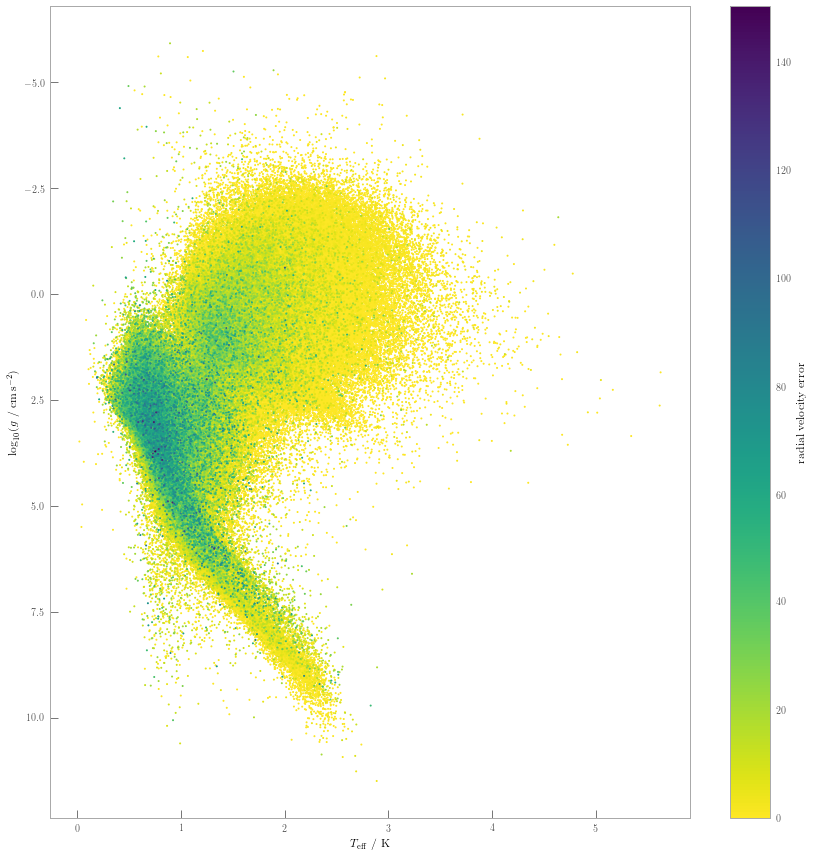

In [41]:
kwds = dict(s=1, alpha=1, cmap="viridis_r")

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
z2 = sources["rv_excess_variance"][subset]**0.5
zidx = np.argsort(z2)
scat = ax.scatter(x[zidx], y[zidx], c=z2[zidx], **kwds)
cbar = plt.colorbar(scat)
cbar.set_label(r"\textrm{radial velocity error}")

ax.set_xlabel(r"$T_{\rm eff}\,\,/\,\,{\rm K}$")
ax.set_ylabel(r"$\log_{10}(g\,\,/\,\,\mathrm{cm\,s}^{-2})$")

ax.set_ylim(ax.get_ylim()[::-1])
fig.tight_layout()

In [30]:
print(sources.dtype.names)

('source_id', 'ra', 'dec', 'l', 'b', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_n_obs', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_n_obs', 'phot_bp_rp_excess_factor', 'bp_rp', 'bp_g', 'g_rp', 'teff_val', 'teff_percentile_lower', 'teff_percentile_upper', 'a_g_val', 'a_g_percentile_lower', 'a_g_percentile_upper', 'radial_velocity', 'radial_velocity_error', 'rv_nb_transits', 'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h', 'astrometric_weight_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'absolute_g_mag', 'absolute_bp_mag', 'absolute_rp_mag', 'rv_single_epoch_variance', 'p_sb_16', 'p_sb_50', 'p_sb_84', 'rv_excess_variance')


/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


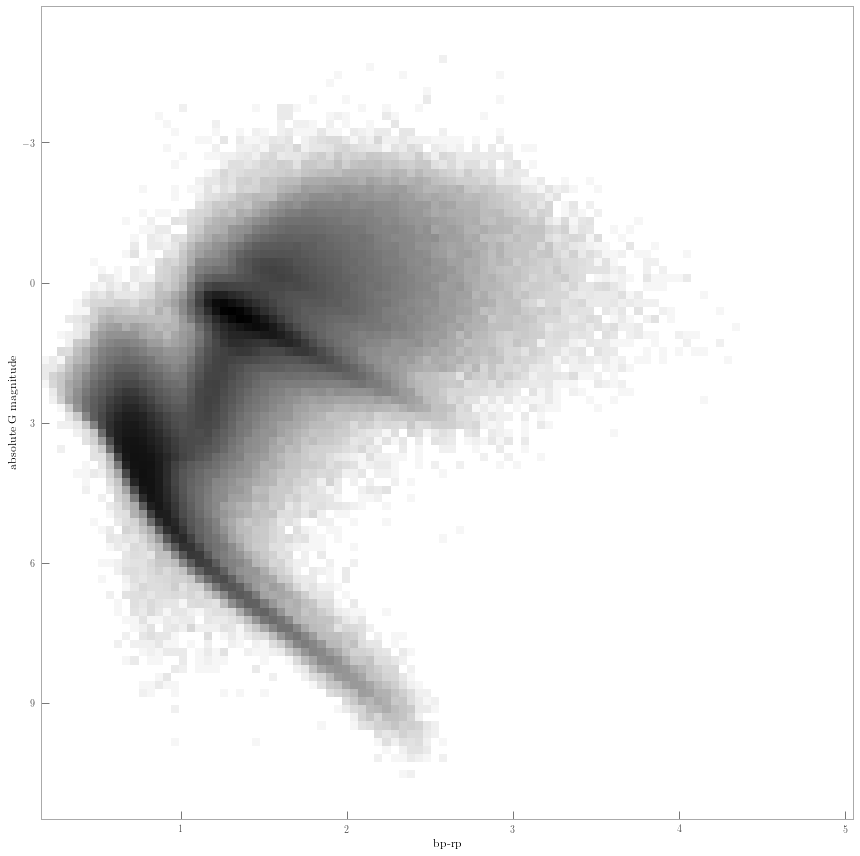

In [37]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator

is_binary = sources["p_sb_50"][subset] > 0.5

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

bins = (100, 100)
H_bin, xedges, yedges = np.histogram2d(x[is_binary], y[is_binary], bins=bins)
H_all, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

H = H_bin/H_all
H[H_all < 3] = np.nan

kwds = dict(
    aspect=np.ptp(xedges)/np.ptp(yedges), 
    extent=(xedges[0], xedges[-1], yedges[-1], yedges[0]),
)

image = ax.imshow(H_all.T, norm=LogNorm(), cmap="Greys", **kwds)

ax.set_xlabel(r"\textrm{bp-rp}")
ax.set_ylabel(r"\textrm{absolute G magnitude}")
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))

fig.tight_layout()

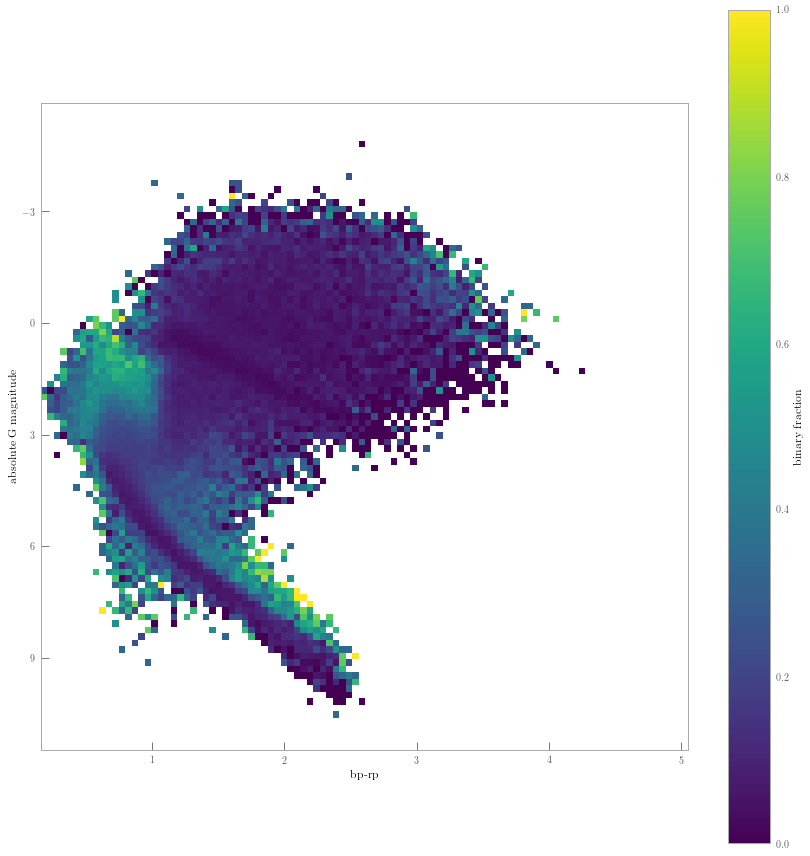

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

image = ax.imshow(H.T, cmap="viridis", **kwds)
cbar = plt.colorbar(image)
cbar.set_label(r"\textrm{binary fraction}")

ax.set_xlabel(r"\textrm{bp-rp}")
ax.set_ylabel(r"\textrm{absolute G magnitude}")
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))

fig.tight_layout()

In [61]:
def plot_average_grid_value(x, y, z, bins=(100, 100), function=np.nanmedian,
                            ax=None, xlabel=None, ylabel=None, zlabel=None,
                            colorbar=True, **kwargs):
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    else:
        fig = ax.figure
        
    H, xedges, yedges = np.histogram2d(x, y, bins=bins)
    
    x_indices = np.digitize(x, xedges) - 1
    y_indices = np.digitize(y, yedges) - 1
    
    Z = np.nan * np.ones_like(H) 
    for i in range(xedges.size - 1):
        for j in range(yedges.size - 1):
            match = (x_indices == i) * (y_indices == j)
            try:
                _ = function(z[match])
                
            except ValueError:
                continue
                
            else:
                Z[i, j] = _

    imshow_kwds = dict(
        aspect=np.ptp(xedges)/np.ptp(yedges), 
        extent=(xedges[0], xedges[-1], yedges[-1], yedges[0]),
        cmap="viridis"
    )
    imshow_kwds.update(kwargs)

    image = ax.imshow(Z.T, **imshow_kwds)
    if colorbar:
        cbar = plt.colorbar(image)
        cbar.set_label(zlabel)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_locator(MaxNLocator(6))
    ax.yaxis.set_major_locator(MaxNLocator(6))

    fig.tight_layout()
    
    return fig


/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


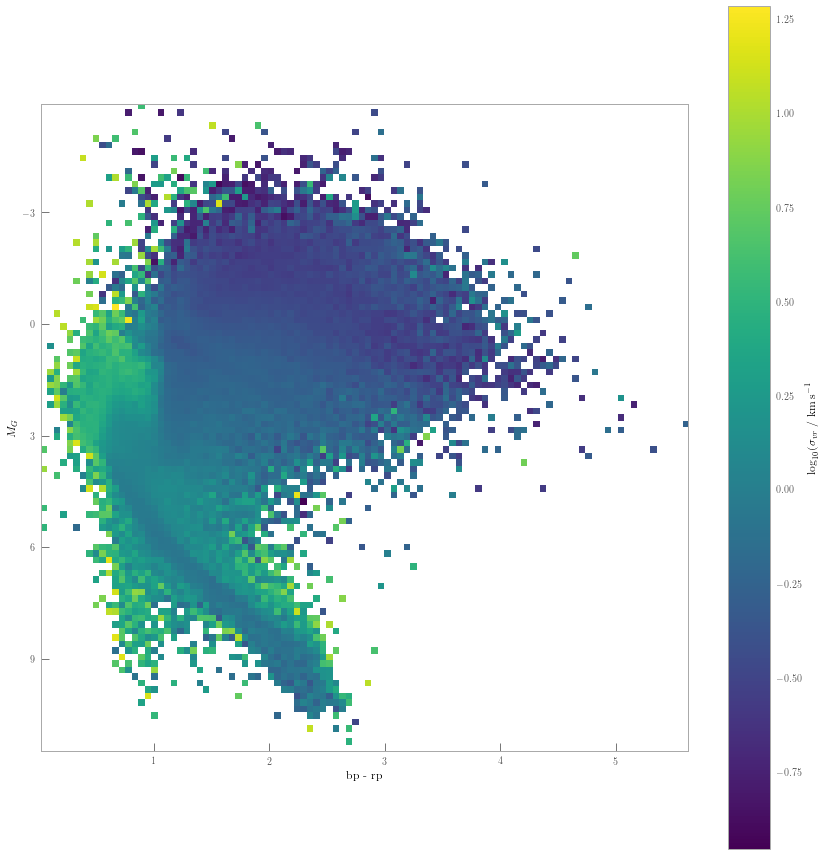

In [55]:
# Colour by the log of the median rv error in each grid point.
fig = plot_average_grid_value(sources["bp_rp"][subset],
                              sources["absolute_g_mag"][subset],
                              sources["radial_velocity_error"][subset],
                              function=lambda _: np.log10(np.nanmedian(_)),
                              xlabel=r"\textrm{bp - rp}",
                              ylabel=r"$M_G$",
                              zlabel=r"$\log_{10}(\sigma_{vr}\,\,/\,\,\mathrm{km\,s}^{-1})$")



/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


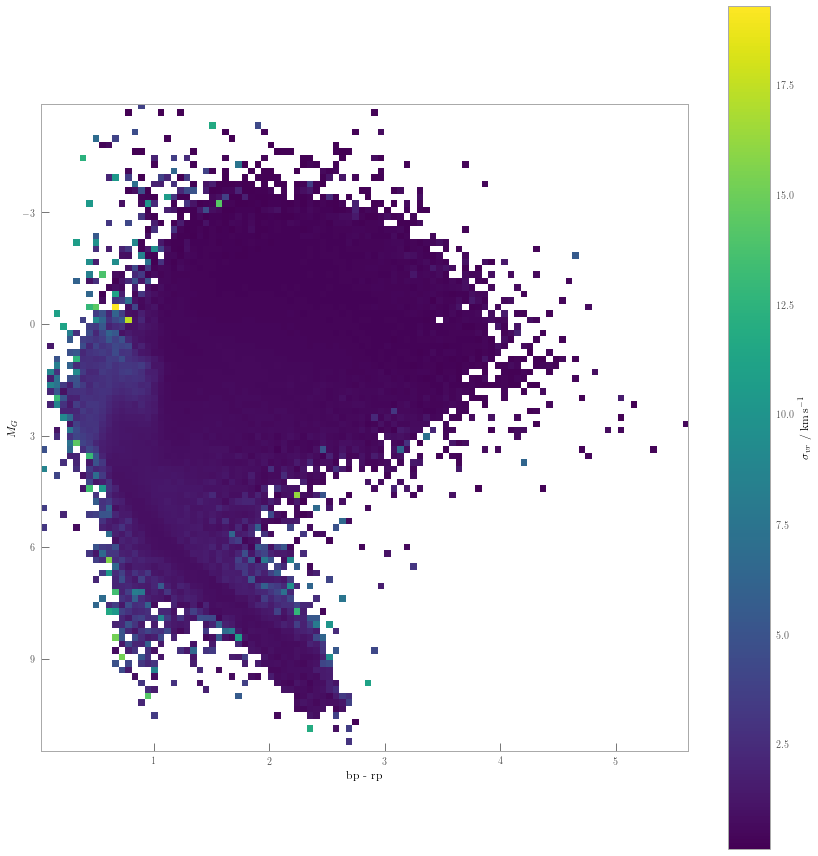

In [56]:
# Colour by the median rv error in each grid point.
fig = plot_average_grid_value(sources["bp_rp"][subset],
                              sources["absolute_g_mag"][subset],
                              sources["radial_velocity_error"][subset],
                              function=np.nanmedian,
                              xlabel=r"\textrm{bp - rp}",
                              ylabel=r"$M_G$",
                              zlabel=r"$\sigma_{vr}\,\,/\,\,\mathrm{km\,s}^{-1}$")



/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


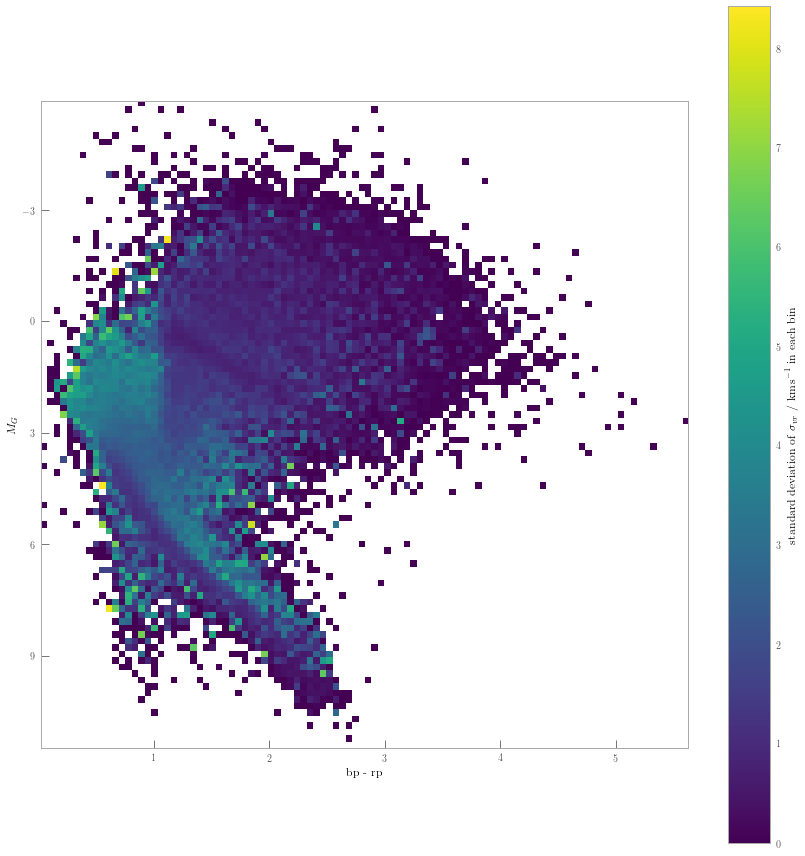

In [59]:
# Colour by the standard deviation of the radial velocity error in each grid point.
fig = plot_average_grid_value(sources["bp_rp"][subset],
                              sources["absolute_g_mag"][subset],
                              sources["radial_velocity_error"][subset],
                              function=np.nanstd,
                              xlabel=r"\textrm{bp - rp}",
                              ylabel=r"$M_G$",
                              zlabel=r"\textrm{standard deviation of} $\sigma_{vr}\,\,/\,\,\mathrm{km\,s}^{-1}$ \textrm{in each bin}")

